# Places Analysis
In this notebook we'll analyze the Google "PlaceVisit" data using [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/). We'll then use the [bokeh](https://docs.bokeh.org) library to visualize the data using the Google Maps API.

In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date
from bokeh.io import show, output_notebook
from bokeh.plotting import gmap
from bokeh.models import GMapOptions, ColumnDataSource

# Configure bokeh to display the generated maps within the Jupyter notebook.
output_notebook()

# Enter your Google Maps API key here.
# See https://developers.google.com/maps/documentation/embed/get-api-key#create-api-keys
API_KEY = r'<ENTER YOUR KEY>'

# Set this to the name of your "places" CSV file.
PLACES_PATH = 'places.csv'
# Optional: configure the start and end dates of data you want to consider.
# `start_date` is inclusive, `end_date` exclusive.
START_DATE = date(2020, 9, 7)
END_DATE = date(2022, 11, 1)
# Optional: configure whether to exclude low-confidence data.
EXCLUDE_LOW_CONFIDENCE = False

In [7]:
places = pd.read_csv(PLACES_PATH, sep='|', encoding='utf-8', parse_dates=['start_timestamp', 'end_timestamp'])
print(f'Original data has {places.shape[0]} rows and {places.shape[1]} columns.')

# Filter out rows that don't match the configured settings
if START_DATE:
    places = places[places['start_timestamp'].dt.date >= START_DATE]
if END_DATE:
    places = places[places['end_timestamp'].dt.date <= END_DATE]
if EXCLUDE_LOW_CONFIDENCE:
    places = places[places['confidence'] != 'LOW_CONFIDENCE']

print(f'Data after filtering has {places.shape[0]} rows and {places.shape[1]} columns.')

Original data has 2586 rows and 8 columns.
Data after filtering has 2515 rows and 8 columns.


In [8]:
# Look at a few rows of example data.
places.head()

,lat_e7,lon_e7,address,name,place_id,start_timestamp,end_timestamp,confidence
14,483508144,109088730,"Professor-Steinbacher-Straße 6A, 86161 Augsbur...",Tennis club Augsburg e.V.,ChIJxfxwmg-YnkcRSIj8Zugybfk,2020-11-06 09:23:07+00:00,2020-11-06 09:25:23.552000+00:00,MEDIUM_CONFIDENCE
15,483497862,108991614,"Bauernfeindstraße 26, 86159 Augsburg, Deutschland",NaN,ChIJj3n4ywmYnkcRnY7Apt2m2lU,2020-11-06 09:31:25.158000+00:00,2020-11-06 12:17:52.914000+00:00,HIGH_CONFIDENCE
16,483762400,109077700,"Oblatterwallstraße 58, 86153 Augsburg, Deutsch...",NaN,ChIJgwbXpVi9nkcRtIXnkJ-sni4,2020-11-06 12:40:26.916000+00:00,2020-11-06 15:13:22+00:00,HIGH_CONFIDENCE
17,483762982,108950833,"Frauentorstraße 53, 86152 Augsburg, Deutschland",NaN,ChIJs4WjK1u9nkcRKeZCaL9PfKo,2020-11-06 15:19:19.698000+00:00,2020-11-06 15:26:19.518000+00:00,MEDIUM_CONFIDENCE
18,483727500,108967900,"Frauentorstraße 1, 86152 Augsburg, Deutschland",Augsburger Dom,ChIJk6gZQ1C9nkcRvvqAoBg-dcU,2020-11-14 12:33:05.728000+00:00,2020-11-14 13:18:13.505000+00:00,LOW_CONFIDENCE


In [9]:
# Convert `lat_e7` and `lon_e7` columns to regular latitude and longitude.
places['latitude'] = places['lat_e7'] / 10**7
places['longitude'] = places['lon_e7'] / 10**7

places.head()

,lat_e7,lon_e7,address,name,place_id,start_timestamp,end_timestamp,confidence,latitude,longitude
14,483508144,109088730,"Professor-Steinbacher-Straße 6A, 86161 Augsbur...",Tennis club Augsburg e.V.,ChIJxfxwmg-YnkcRSIj8Zugybfk,2020-11-06 09:23:07+00:00,2020-11-06 09:25:23.552000+00:00,MEDIUM_CONFIDENCE,48.350814,10.908873
15,483497862,108991614,"Bauernfeindstraße 26, 86159 Augsburg, Deutschland",NaN,ChIJj3n4ywmYnkcRnY7Apt2m2lU,2020-11-06 09:31:25.158000+00:00,2020-11-06 12:17:52.914000+00:00,HIGH_CONFIDENCE,48.349786,10.899161
16,483762400,109077700,"Oblatterwallstraße 58, 86153 Augsburg, Deutsch...",NaN,ChIJgwbXpVi9nkcRtIXnkJ-sni4,2020-11-06 12:40:26.916000+00:00,2020-11-06 15:13:22+00:00,HIGH_CONFIDENCE,48.376240,10.907770
17,483762982,108950833,"Frauentorstraße 53, 86152 Augsburg, Deutschland",NaN,ChIJs4WjK1u9nkcRKeZCaL9PfKo,2020-11-06 15:19:19.698000+00:00,2020-11-06 15:26:19.518000+00:00,MEDIUM_CONFIDENCE,48.376298,10.895083
18,483727500,108967900,"Frauentorstraße 1, 86152 Augsburg, Deutschland",Augsburger Dom,ChIJk6gZQ1C9nkcRvvqAoBg-dcU,2020-11-14 12:33:05.728000+00:00,2020-11-14 13:18:13.505000+00:00,LOW_CONFIDENCE,48.372750,10.896790


In [10]:
print('Number of records, by level of confidence')
places['confidence'].value_counts()

Number of records, by level of confidence


HIGH_CONFIDENCE      1524
MEDIUM_CONFIDENCE     811
LOW_CONFIDENCE        180
Name: confidence, dtype: int64

In [11]:
# Let's take a few columns of data and count the number of visits.
# You can see that the first result is my old address in Augsburg.
# Each of these rows has an address. However, only those that house a business have an actual name.
visits = places.groupby(['name', 'address', 'latitude', 'longitude'], dropna=False)
visits = visits.size().reset_index(name='counts')
visits.sort_values(by='counts', ascending=False, inplace=True)
visits[:5]

,name,address,latitude,longitude,counts
583,NaN,"Beethovenstraße 3, 86150 Augsburg, Deutschland",48.363816,10.894314,750
493,Tennis club Augsburg e.V.,"Professor-Steinbacher-Straße 6A, 86161 Augsbur...",48.350814,10.908873,135
599,NaN,"Oblatterwallstraße 58, 86153 Augsburg, Deutsch...",48.376240,10.907770,95
554,rutaNatur,"Prinzregentenstraße 7, 86150 Augsburg, Deutsch...",48.368580,10.890721,55
171,GALERIA Augsburg,"Bürgermeister-Fischer-Straße 6-10, 86150 Augsb...",48.367158,10.896289,50


In [12]:
# Count the number of times that each *named* place was recorded.
# Note that this does not include unnamed entries (e.g., personal addresses).
print('Top ten places, by number of records')
places['name'].value_counts()[:10]

Top ten places, by number of records


Tennis club Augsburg e.V.      135
rutaNatur                       56
GALERIA Augsburg                54
GALERIA (Karstadt) Augsburg     49
Munich Central Station          46
Augsburg                        41
Augsburg Bohus Center           28
REWE                            26
QPLIX GmbH                      26
Königsplatz                     25
Name: name, dtype: int64

In [14]:
# Calculate time spent per *named* place.
print('Top ten places, by duration:')
places['duration'] = places['end_timestamp'] - places['start_timestamp']
time_spent = places.groupby('name')['duration'].sum()
time_spent.sort_values(inplace=True, ascending=False)
time_spent[:10]

Top ten places, by duration:


name
Tennis club Augsburg e.V.             8 days 23:42:13.158000
QPLIX GmbH                            4 days 16:18:07.514000
Hôtel La Bastide Saint Martin         2 days 01:17:25.617000
Hotel Royal Plaza                     2 days 00:59:05.271000
Hôtel Restaurant Campanile Manosque   1 days 22:07:09.385000
Augsburg Bohus Center                 1 days 09:23:16.059000
Outdoorhotel Jäger von Fall           1 days 08:11:10.960000
Residenza Elisabetta                  1 days 07:53:32.441000
Résidence Bellevue                    1 days 02:23:10.201000
Hôtel & Spa Les Mouettes              0 days 22:10:40.309000
Name: duration, dtype: timedelta64[ns]

In [16]:
# Determine the country of each record based on the address.
# The country is the last part of the address, so we apply a lambda
# function that splits the address on the comma and takes the last part of it.
# This doesn't work perfectly because sometimes the same country has different names. But it's good enough for now.
places['country'] = places['address'].dropna().apply(lambda address: address.split(',')[-1].strip())
places['country'].value_counts()

Deutschland      2121
France            123
USA               117
Italia             51
Österreich         44
Belgique           18
Česko              12
Schweiz            10
België              9
Czechia             3
Inn                 1
United States       1
Italie              1
Germany             1
Name: country, dtype: int64

Text(0, 0.5, '')

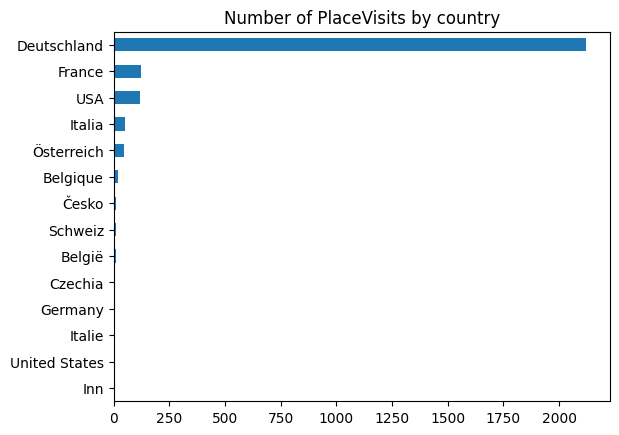

In [17]:
# Plot the number of records per country
ax = places['country'].value_counts().sort_values().plot.barh()
ax.set_title('Number of PlaceVisits by country')
ax.set_xlabel('')
ax.set_ylabel('')

In [ ]:
# Plot a map centered on Augsburg, Germany but showing most of Europe.
gmap_options = GMapOptions(lat=48.3705, lng=10.8978, map_type='roadmap', zoom=5)
plot = gmap(API_KEY, gmap_options, title='Europe', width=600, height=600)

# Plot each row from the `places` dataframe as a small circle overlaid on the map.
# Tell bokeh to use the `longitude` and `latitude` columns of the dataframe. 
plot.circle('longitude', 'latitude', size=4, alpha=0.2, color='red', source=ColumnDataSource(places))
show(plot)

In [ ]:
# Create a new column called `num_visits` that counts the number of times
# each (latitude, longitude) pair is in the data.
visits = places.groupby(['latitude', 'longitude']).size().reset_index(name='num_visits')

# For each row of data, calculate the size of the circle that should be shown on the map.
# We basically set a minimum size of 4 and a maximum size of 30, based on the number of visits.
visits['plot_size'] = visits['num_visits'].apply(lambda row: min(max(row, 4), 30))

# Plot a high-zoom map centered on Augsburg, Germany.
gmap_options = GMapOptions(lat=48.3705, lng=10.8978, map_type='roadmap', zoom=14)
plot = gmap(API_KEY, gmap_options, title='Augsburg', width=600, height=600)
plot.circle('longitude', 'latitude', size='plot_size', alpha=0.3, color='red', source=ColumnDataSource(visits))
show(plot)